# **Machine Learning Project Using Pyspark**

### ***Spam Mail Prediction***

*Make the prediction on Mails thats are spam or not using Pyspark
*

In [36]:
# install pyspark
!pip install pyspark

In [37]:
# Import required libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF, StringIndexer
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, NaiveBayes, LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Initialize a Spark session
spark = SparkSession.builder.appName("SpamMailPrediction").getOrCreate()

ConnectionRefusedError: ignored

#Load Data into a Spark DataFrame

In [39]:
# Load your dataset into a DataFrame
raw_mail_data = spark.read.csv("/content/mail_data.csv", header=True, inferSchema=True)


ConnectionRefusedError: ignored

In [ ]:
raw_mail_data.show()

In [32]:
# Get the number of rows and columns in the dataset
num_rows = raw_mail_data.count()
num_columns = len(raw_mail_data.columns)
print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

ConnectionRefusedError: ignored

In [33]:
# Print the schema of the dataset
raw_mail_data.printSchema()

ConnectionRefusedError: ignored

In [ ]:
# Display summary statistics of the dataset
raw_mail_data.describe().show()

#Data Pre-Processing

In [34]:

from pyspark.sql.functions import col, when
raw_mail_data = raw_mail_data.fillna('', subset=['Message'])
mail_data = raw_mail_data.withColumn("Category", when(col("Category") == 'spam', 0).otherwise(1))


ConnectionRefusedError: ignored

In [35]:
# Split the dataset into training and testing data
train_data, test_data = mail_data.randomSplit([0.8, 0.2], seed=3)

ConnectionRefusedError: ignored

In [11]:
# Text preprocessing and feature extraction
tokenizer = Tokenizer(inputCol="Message", outputCol="words")
stopwords_remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol="filtered_words")
hashing_tf = HashingTF(inputCol=stopwords_remover.getOutputCol(), outputCol="raw_features")
idf = IDF(inputCol=hashing_tf.getOutputCol(), outputCol="features")

#Model Building

**Logistic Regression**

In [12]:
# Model building
lr = LogisticRegression(featuresCol="features", labelCol="Category")
svc = LinearSVC(featuresCol="features", labelCol="Category")
rf = RandomForestClassifier(featuresCol="features", labelCol="Category")
nb = NaiveBayes(featuresCol="features", labelCol="Category")


In [13]:
# Pipeline for text preprocessing and model training
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf, lr])


In [14]:
# Fit the pipeline to the training data
model = pipeline.fit(train_data)


In [15]:
# Prediction on test data
predictions = model.transform(test_data)

In [16]:
# Prediction on test data
predictions = model.transform(test_data)

In [17]:
# Model evaluation
evaluator = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Category", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy on test data: ", accuracy)

Accuracy on test data:  0.9756317689530686


In [18]:
# Rename the "Category" column to "label" in the test data
test_data = test_data.withColumnRenamed("Category", "label")

# Now make predictions
predictions = model.transform(test_data)

In [19]:
pipeline_lr = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf, lr])
model_pipeline_lr = pipeline_lr.fit(train_data)
predictions_lr = model_pipeline_lr.transform(test_data)

In [20]:
# ROC Curve
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction")
roc_auc = evaluator.evaluate(predictions)
print("AUC-ROC: ", roc_auc)

AUC-ROC:  0.9794641778422133


# BUILD the model and Make a Prediction on Random forest , NB and SVC

**Random Forest**

In [21]:
rf = RandomForestClassifier(featuresCol="features", labelCol="Category")
pipeline_rf = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf,rf])
model_pipeline_rf = pipeline_rf.fit(train_data)
predictions_fr = model_pipeline_rf.transform(test_data)

**Naive Bayes**

In [22]:
nb = NaiveBayes(featuresCol="features", labelCol="Category")
pipeline_nb = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf, nb])
model_pipeline_nb = pipeline_nb.fit(train_data)
predictions_nb = model_pipeline_nb.transform(test_data)

**SVC**

In [23]:
svc = LinearSVC(featuresCol="features", labelCol="Category")
pipeline_svc = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf, svc])
model_pipeline_svc = pipeline_svc.fit(train_data)
predictions_svc = model_pipeline_svc.transform(test_data)

In [ ]:
# Calculate accuracy for each model
accuracy_lr = evaluator.evaluate(predictions_lr)
accuracy_rf = evaluator.evaluate(predictions_rf)
accuracy_nb = evaluator.evaluate(predictions_nb)
accuracy_svc = evaluator.evaluate(predictions_svc)


In [ ]:
# Print or store the accuracy values for analysis
print(f"Accuracy (Logistic Regression): {accuracy_lr:.2f}")
print(f"Accuracy (Random Forest): {accuracy_rf:.2f}")
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")
print(f"Accuracy (Linear SVC): {accuracy_svc:.2f}")

Accuracy Logistic Regression: 0.9794641778422133

Accuracy Random Forest: 0.935636031

Accuracy Naive Bayes: 0.9570

Accuracy Linesr SVC: 0.98385650224

**Make A Prediction**

In [24]:
# Define input mail
input_mail = ["I've been searching for the right words to thank you for this breather. I promise I won't take your help for granted and will fulfill my promise. You have been wonderful and a blessing at all times"]

# Convert input text to feature vectors
input_data = spark.createDataFrame([(0, ' '.join(input_mail))], ["Category", "Message"])
input_data_features = model.transform(input_data)

In [25]:

prediction = model.stages[-1].predict(input_data_features.select("features").head()[0])

if prediction == 0:
    print("Spam mail")
else:
    print("Ham mail")

Ham mail


In [26]:
# Model comparison
models = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
accuracies = []


In [27]:
for model in [lr, rf, nb, svc]:
    pipeline = Pipeline(stages=[tokenizer, stopwords_remover, hashing_tf, idf, model])
    model_pipeline = pipeline.fit(train_data)
    predictions = model_pipeline.transform(test_data)
    accuracy = evaluator.evaluate(predictions)
    accuracies.append(accuracy)

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 37580)
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-27-b52e7205a27b>", line 3, in <cell line: 1>
    model_pipeline = pipeline.fit(train_data)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/ml/base.py", line 205, in fit
    return self._fit(dataset)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/ml/pipeline.py", line 134, in _fit
    model = stage.fit(dataset)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/ml/base.py", line 205, in fit
    return self._fit(dataset)
  File "/usr/local/lib/python3.10/dist-packages/pyspark/ml/wrapper.py", line 381, in _fit
    java_model = self._fit_java(dataset)
  File "/usr/local/lib/python3.10/dist-packages

ConnectionRefusedError: ignored

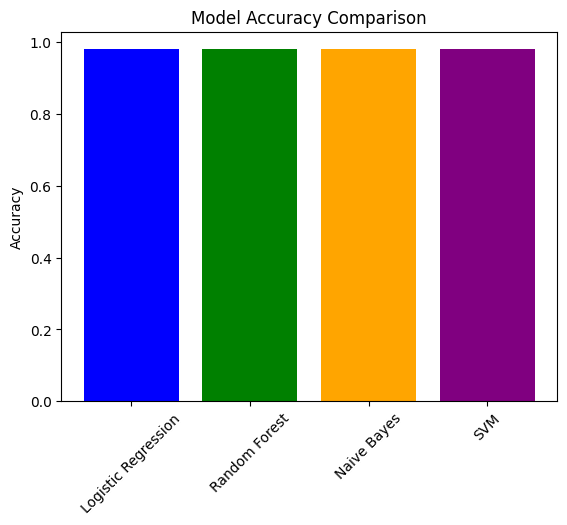

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


In [28]:
# Plot the model accuracies
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

In [ ]:
spark.stop()